In [1]:
import json
import requests
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Display all rows and columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Reading in  the tables

In [2]:
title_principals_path = "./title.principals.tsv/data.tsv"

imdb_movies_path = "./imdb_movies.csv"

principals = pd.read_csv(title_principals_path, sep='\t', index_col="tconst",  na_values=['\\N'])
movies = pd.read_csv(imdb_movies_path, index_col='tconst')

In [3]:
movies.shape

(237480, 9)

In [4]:
# this will get the 90% quantile of the numVotes per year and save it into a dictionary in the form of startYear: 90 quantile number
yearly_quantile = movies.groupby(['startYear']).numVotes.quantile(0.9).to_dict()

In [5]:
# Only want to take the rows with more than the 90 quantile numVotes per year

for v,k in yearly_quantile.items():
    movie_year = movies[movies.startYear==v]
    movies.drop(movie_year[movie_year.numVotes<k].index, inplace=True)

In [8]:
movies.to_csv('movies_top10.csv')

In [7]:
movies.head()

primaryTitle       originalTitle  startYear  \
tconst                                                           
tt0016029    The Little Colonel  The Little Colonel     1935.0   
tt0017961             Happiness             Schaste     1935.0   
tt0020298           Queen Kelly         Queen Kelly     1932.0   
tt0021079         Little Caesar       Little Caesar     1931.0   
tt0021309  The Story of the Fox  Le roman de Renard     1937.0   

           runtimeMinutes                      genres            directors  \
tconst                                                                       
tt0016029            81.0       Comedy,Family,Musical            nm0124877   
tt0017961            95.0                Comedy,Drama            nm0575963   
tt0020298           101.0                       Drama  nm0092915,nm0002233   
tt0021079            79.0          Action,Crime,Drama            nm0503777   
tt0021309            63.0  Adventure,Animation,Comedy  nm0823089,nm0823088   

                                                     writers  averageRating  \
tconst                                                                        
tt0016029                      nm0175902,nm0426531,nm0124877            7.1   
tt0017961                                          nm0575963            7.5   
tt0020298                      nm0002233,nm0014703,nm0322227            7.2   
tt0021079            nm0122446,nm0267020,nm0520501,nm0953123            7.3   
tt0021309  nm0634113,nm0635163,nm0724858,nm0823089,nm0823...            7.8   

           numVotes  
tconst               
tt0016029    1314.0  
tt0017961     897.0  
tt0020298    3013.0  
tt0021079   11410.0  
tt0021309    1105.0

In [8]:
principals.head()

ordering     nconst         category                      job  \
tconst                                                                     
tt0000001         1  nm1588970             self                      NaN   
tt0000001         2  nm0005690         director                      NaN   
tt0000001         3  nm0374658  cinematographer  director of photography   
tt0000002         1  nm0721526         director                      NaN   
tt0000002         2  nm1335271         composer                      NaN   

          characters  
tconst                
tt0000001   ["Self"]  
tt0000001        NaN  
tt0000001        NaN  
tt0000002        NaN  
tt0000002        NaN

# Merging tables

In [9]:
movies_MP_top10 = principals.merge(movies, on='tconst', how='inner')

In [10]:
movies_MP_top10.head()

ordering     nconst         category  job         characters  \
tconst                                                                    
tt0016029        10  nm0005877  cinematographer  NaN                NaN   
tt0016029         1  nm0000073          actress  NaN  ["Lloyd Sherman"]   
tt0016029         2  nm0000859            actor  NaN  ["Colonel Lloyd"]   
tt0016029         3  nm0892867          actress  NaN      ["Elizabeth"]   
tt0016029         4  nm0517099            actor  NaN   ["Jack Sherman"]   

                 primaryTitle       originalTitle  startYear  runtimeMinutes  \
tconst                                                                         
tt0016029  The Little Colonel  The Little Colonel     1935.0            81.0   
tt0016029  The Little Colonel  The Little Colonel     1935.0            81.0   
tt0016029  The Little Colonel  The Little Colonel     1935.0            81.0   
tt0016029  The Little Colonel  The Little Colonel     1935.0            81.0   
tt0016029  The Little Colonel  The Little Colonel     1935.0            81.0   

                          genres  directors                        writers  \
tconst                                                                       
tt0016029  Comedy,Family,Musical  nm0124877  nm0175902,nm0426531,nm0124877   
tt0016029  Comedy,Family,Musical  nm0124877  nm0175902,nm0426531,nm0124877   
tt0016029  Comedy,Family,Musical  nm0124877  nm0175902,nm0426531,nm0124877   
tt0016029  Comedy,Family,Musical  nm0124877  nm0175902,nm0426531,nm0124877   
tt0016029  Comedy,Family,Musical  nm0124877  nm0175902,nm0426531,nm0124877   

           averageRating  numVotes  
tconst                              
tt0016029            7.1    1314.0  
tt0016029            7.1    1314.0  
tt0016029            7.1    1314.0  
tt0016029            7.1    1314.0  
tt0016029            7.1    1314.0

In [11]:
movies_MP_top10.shape

(234946, 14)

In [12]:
movies_MP_top10.to_csv("movies_MP_top10.csv")

# Get the unique nconsts

In [259]:
# only get the unique nconsts from the table to get information from the The Movie Database
nconsts_top10 = movies_MP_top10.nconst.unique().tolist()

In [260]:
# still end up with almost 10,000 entries to make API calls for
len(nconsts_top10)

91881

# Using the Movie Database API to get values

In [268]:
gap = 10000
end = 90000
api_key = #insert your api key
# len(nconsts_top10)

for i in range(0,end,gap):
    nconsts3 = nconsts_top10[i:i+gap]
    nconst_dict3 = {}
    
    for nconst in nconsts3:
        moviedb_link = "https://api.themoviedb.org/3/find/%s?api_key=%s&language=en-US&external_source=imdb_id"%(api_key,nconst)
        response = requests.get(moviedb_link)
        if response.status_code==200:
            data = response.json()
            nconst_dict3[nconst] = data['person_results']
        else:
            print(response.status_code)
            break
    
    nconst_json = json.dumps(nconst_dict3)
    # saving the json file every time we went through 10,000
    f = open("nconsts_dict_J_%s_%s.json"%(i,i+gap),"w")
    f.write(nconst_json)
    f.close()
    

In [269]:
# the functions to get the ending api calls
nconsts3 = nconsts_top10[90000:]
nconst_dict3 = {}
    
for nconst in nconsts3:
    moviedb_link = "https://api.themoviedb.org/3/find/%s?api_key=23e2c6942f2f787da35a8602a14f48c3&language=en-US&external_source=imdb_id"%(nconst)
    response = requests.get(moviedb_link)
    if response.status_code==200:
        data = response.json()
        nconst_dict3[nconst] = data['person_results']
    else:
        print(response.status_code)
        break
    
nconst_json = json.dumps(nconst_dict3)
f = open("nconsts_dict_J_%s_%s.json"%(90000,len(nconsts_top10)),"w")
f.write(nconst_json)
f.close()
    

## DO NOT NEED THOSE BELOW

In [186]:
yearly_quantile[1932]

284.6000000000005

In [187]:
movies2 = movies.copy()

In [228]:
movies.head()

tconst        primaryTitle       originalTitle  startYear  \
0  tt0003854    Dodge City Trail    Dodge City Trail     1936.0   
1  tt0015724       Dama de noche       Dama de noche     1993.0   
2  tt0016029  The Little Colonel  The Little Colonel     1935.0   
3  tt0016906          Frivolinas          Frivolinas     2014.0   
4  tt0017961           Happiness             Schaste     1935.0   

   runtimeMinutes                   genres  directors  \
0            56.0  Adventure,Music,Western  nm0170973   
1           102.0    Drama,Mystery,Romance  nm0529960   
2            81.0    Comedy,Family,Musical  nm0124877   
3            80.0           Comedy,Musical  nm0136068   
4            95.0             Comedy,Drama  nm0575963   

                         writers  averageRating  numVotes  
0                      nm0795851            3.7      19.0  
1            nm0529960,nm1597742            6.2      20.0  
2  nm0175902,nm0426531,nm0124877            7.1    1314.0  
3                            NaN            5.6      15.0  
4                      nm0575963            7.5     897.0

In [139]:
movies.groupby(['startYear']).numVotes.describe()

count         mean           std  min    25%   50%     75%  \
startYear                                                                
1931.0      662.0   921.803625   8655.017767  5.0  14.00  43.0  158.00   
1932.0      767.0   501.075619   2321.568154  5.0  15.00  37.0  182.00   
1933.0      744.0   537.772849   3689.479146  5.0  14.00  44.0  218.00   
1934.0      853.0   414.645955   3314.112453  5.0  15.00  42.0  175.00   
1935.0      953.0   405.241343   2558.297938  5.0  15.00  38.0  133.00   
1936.0     1001.0   551.347652   6625.978252  5.0  14.00  37.0  129.00   
1937.0     1009.0   499.428147   5667.784383  5.0  16.00  41.0  132.00   
1938.0      988.0   425.117409   2919.077330  5.0  12.00  33.0  125.25   
1939.0      956.0  1257.850418  15236.259419  5.0  13.00  40.5  157.00   
1940.0      922.0  1161.122560   9746.301419  5.0  13.00  39.0  170.75   
1941.0      929.0  1162.628633  14010.003656  5.0  15.00  42.0  170.00   
1942.0      940.0  1151.956383  16911.469234  5.0  15.00  42.5  154.25   
1943.0      885.0   440.976271   2225.779021  5.0  14.00  35.0  164.00   
1944.0      751.0   856.110519   6032.409248  5.0  14.00  44.0  202.50   
1945.0      687.0   719.078603   3046.656770  5.0  14.00  47.0  232.50   
1946.0      757.0  1378.989432  14757.216443  5.0  15.00  49.0  207.00   
1947.0      807.0   601.768278   2553.827594  5.0  14.00  46.0  221.00   
1948.0      860.0  1029.086047   7610.928512  5.0  14.00  54.0  221.50   
1949.0      960.0   712.248958   5354.374420  5.0  13.00  39.0  192.25   
1950.0     1052.0  1048.586502   9476.753078  5.0  12.75  36.0  190.00   
1951.0     1043.0   932.325983   7070.329000  5.0  13.00  40.0  216.00   
1952.0     1056.0   776.823864   7471.537107  5.0  12.00  46.0  196.50   
1953.0     1130.0   978.733628   6314.806169  5.0  13.00  43.5  209.00   
1954.0     1149.0  1487.419495  16681.997527  5.0  12.00  36.0  165.00   
1955.0     1177.0   999.842821   5948.637984  5.0  12.00  39.0  199.00   
1956.0     1213.0   795.446002   4707.981789  5.0  13.00  41.0  183.00   
1957.0     1353.0  1525.841094  19912.905484  5.0  13.00  41.0  188.00   
1958.0     1310.0   899.252672  10066.736478  5.0  14.00  43.0  197.75   
1959.0     1359.0  1277.994113  12616.388007  5.0  13.00  34.0  171.00   
1960.0     1355.0  1348.960148  16890.730620  5.0  12.00  34.0  154.50   
1961.0     1401.0   944.812991   7642.524007  5.0  12.00  36.0  157.00   
1962.0     1452.0  1264.927686  11624.150971  5.0  12.00  37.0  150.00   
1963.0     1416.0  1119.468927   9111.453059  5.0  14.00  39.0  161.25   
1964.0     1552.0  1271.521263  13642.719459  5.0  13.00  37.0  166.50   
1965.0     1569.0   913.975781   8295.454660  5.0  13.00  37.0  169.00   
1966.0     1591.0  1196.265871  17041.902250  5.0  13.00  40.0  171.00   
1967.0     1653.0  1134.915910   9482.118448  5.0  14.00  40.0  178.00   
1968.0     1872.0  1309.150107  16353.422798  5.0  14.00  40.0  168.25   
1969.0     1877.0   750.676612   6355.878985  5.0  13.00  39.0  158.00   
1970.0     1969.0   686.955815   4134.647920  5.0  13.00  37.0  178.00   
1971.0     1950.0  1396.204103  17819.396005  5.0  13.00  42.0  208.75   
1972.0     1981.0  1575.988894  34717.680329  5.0  14.00  44.0  202.00   
1973.0     1997.0  1401.412118  11759.157441  5.0  14.00  40.0  185.00   
1974.0     1928.0  1597.214212  26045.271034  5.0  14.00  39.0  180.25   
1975.0     1795.0  2001.493593  27713.741076  5.0  12.00  38.0  201.00   
1976.0     1822.0  1678.990121  21003.820566  5.0  14.00  41.0  202.75   
1977.0     1813.0  1788.218423  29112.577775  5.0  15.00  44.0  198.00   
1978.0     1807.0  1406.197565  11988.861290  5.0  13.00  39.0  161.50   
1979.0     1975.0  2078.789367  24501.148638  5.0  13.00  37.0  157.00   
1980.0     1883.0  2570.168879  34314.367939  5.0  13.00  35.0  179.50   
1981.0     1952.0  1927.362193  21526.648591  5.0  14.00  40.0  190.50   
1982.0     2021.0  2241.486393  21430.256676  5.0  13.00  39.0  197.00   
1983.0     2046.

In [227]:
movies2.shape

(47562, 10)

In [ ]:
movies.groupby(['startYear']).numVotes.quantile(0.8)

In [165]:
grouped = movies.groupby("startYear")

filtered_movies = grouped.apply(lambda g: g[g.numVotes >= g.numVotes.quantile(0.8)])

In [168]:
filtered_movies.shape

(47562, 10)

In [ ]:
filtered_movies.head(20)

In [169]:
filtered_movies.head(20)

tconst                                       primaryTitle  \
startYear                                                                     
1931.0    17   tt0021079                                      Little Caesar   
          19   tt0021128                                               Mary   
          28   tt0021376                                       The Sin Ship   
          33   tt0021580                                           24 Hours   
          47   tt0021607                                An American Tragedy   
          56   tt0021622                                         Arrowsmith   
          59   tt0021632                                 Bachelor Apartment   
          60   tt0021633                                The Bachelor Father   
          62   tt0021635                                           Bad Girl   
          63   tt0021636                                     The Bad Sister   
          67   tt0021649                                Behind Office Doors   
          70   tt0021654  Berlin-Alexanderplatz: The Story of Franz Bibe...   
          76   tt0021668                                    The Black Camel   
          79   tt0021673                                       Blonde Crazy   
          89   tt0021697                                        Broadminded   
          97   tt0021730                                          The Champ   
          99   tt0021733                            Charlie Chan Carries On   
          100  tt0021735                                          The Cheat   
          101  tt0021739                                         La Chienne   
          104  tt0021746                                           Cimarron   

                                                   originalTitle  startYear  \
startYear                                                                     
1931.0    17                                       Little Caesar     1931.0   
          19                                                Mary     1931.0   
          28                                        The Sin Ship     1931.0   
          33                                            24 Hours     1931.0   
          47                                 An American Tragedy     1931.0   
          56                                          Arrowsmith     1931.0   
          59                                  Bachelor Apartment     1931.0   
          60                                 The Bachelor Father     1931.0   
          62                                            Bad Girl     1931.0   
          63                                      The Bad Sister     1931.0   
          67                                 Behind Office Doors     1931.0   
          70   Berlin-Alexanderplatz - Die Geschichte Franz B...     1931.0   
          76                                     The Black Camel     1931.0   
          79                                        Blonde Crazy     1931.0   
          89                                         Broadminded     1931.0   
          97                                           The Champ     1931.0   
          99                             Charlie Chan Carries On     1931.0   
          100                                          The Cheat     1931.0   
          101                                         La chienne     1931.0   
          104                                           Cimarron     1931.0   

               runtimeMinutes                  genres            directors  \
startYear                                                                    
1931.0    17             79.0      Action,Crime,Drama            nm0503777   
          19             78.0        Mystery,Thriller            nm0000033   
          28             65.0                   Drama            nm0938464   
          33             66.0                   Drama            nm0314351   
          47             96.0     Crime,Drama,Romance            nm09030

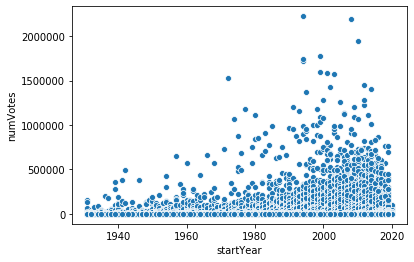

In [19]:
sns.scatterplot(data=movies,x='startYear',y='numVotes')

In [125]:
movies_500votes = movies[movies.numVotes>=500]

In [127]:
movies_500votes.shape

(43879, 10)

In [137]:
movies_500votes.tail()

tconst                    primaryTitle  \
237418  tt9894470                             VFW   
237426  tt9898858                 Coffee & Kareem   
237438  tt9900782                          Kaithi   
237448  tt9905462                       Pengalila   
237465  tt9911196  De Beentjes van Sint-Hildegard   

                         originalTitle  startYear  runtimeMinutes  \
237418                             VFW     2019.0            92.0   
237426                 Coffee & Kareem     2020.0            88.0   
237438                          Kaithi     2019.0           145.0   
237448                       Pengalila     2019.0           111.0   
237465  De Beentjes van Sint-Hildegard     2020.0           103.0   

                 genres  directors              writers  averageRating  \
237418    Action,Horror  nm3976308  nm2244274,nm2100227            6.2   
237426    Action,Comedy  nm0236226            nm3377973            5.1   
237438  Action,Thriller  nm7992231            nm7992231            8.5   
237448            Drama  nm0151535            nm0151535            8.8   
237465     Comedy,Drama  nm0631590            nm0277932            7.8   

        numVotes  
237418    2339.0  
237426    7490.0  
237438    6702.0  
237448     550.0  
237465     515.0

In [129]:
movies_500votes.numVotes.describe()

count    4.387900e+04
mean     1.806372e+04
std      7.225255e+04
min      5.000000e+02
25%      8.650000e+02
50%      1.822000e+03
75%      6.359500e+03
max      2.225066e+06
Name: numVotes, dtype: float64

In [132]:
movies_MP_500.shape

(429711, 15)

In [135]:
nconsts_500 = movies_MP_500.nconst.unique().tolist()

In [136]:
len(nconsts_500)

166574

In [ ]:
gap = 15000

for (i=0;i<len(nconsts_500);i+=gap):
    nconsts3 = nconsts_500[i:i+gap]
    nconst_dict3 = {}
    
    for nconst in nconsts3:
        moviedb_link = "https://api.themoviedb.org/3/find/%s?api_key=23e2c6942f2f787da35a8602a14f48c3&language=en-US&external_source=imdb_id"%(nconst)
        response = requests.get(moviedb_link)
        if response.status_code==200:
            data = response.json()
            nconst_dict3[nconst] = data['person_results']
        else:
            print(response.status_code)
            break
    
    nconst_json = json.dumps(nconst_dict3)
    f = open("nconsts_dict_J_%s_%s.json"%(i,i+gap),"w")
    f.write(nconst_json)
    f.close()
    

In [109]:
nconsts2 = nconsts[35000:50000]

In [111]:
len(nconsts2)

15000

In [112]:
nconst_dict2 = {}

for nconst in nconsts2:
    moviedb_link = "https://api.themoviedb.org/3/find/%s?api_key=23e2c6942f2f787da35a8602a14f48c3&language=en-US&external_source=imdb_id"%(nconst)
    response = requests.get(moviedb_link)
    if response.status_code==200:
        data = response.json()
        nconst_dict2[nconst] = data['person_results']
    else:
        break

KeyboardInterrupt: 

In [113]:
len(nconst_dict2)

4960

In [114]:
len(nconst_dict)

35000

In [86]:
nconst_dict

{'nm0005877': [{'adult': False,
   'gender': 2,
   'name': 'William V. Skall',
   'id': 17668,
   'known_for': [{'id': 1580,
     'video': False,
     'vote_count': 1363,
     'vote_average': 8.0,
     'title': 'Rope',
     'release_date': '1948-08-26',
     'original_language': 'en',
     'original_title': 'Rope',
     'genre_ids': [80, 53],
     'backdrop_path': '/81LX4wktTXWEXjLNlkHTmJm7tRu.jpg',
     'adult': False,
     'overview': 'Two men attempt to prove they committed the perfect crime by hosting a dinner party after strangling their former classmate to death.',
     'poster_path': '/tJlmMbaleBT8IwuidgI0ZvlLbWA.jpg',
     'popularity': 10.48,
     'media_type': 'movie'},
    {'adult': False,
     'backdrop_path': '/goyLlBUlfZwbKIJFvPbRmpkKYZ.jpg',
     'genre_ids': [18, 36, 10749],
     'id': 11620,
     'original_language': 'en',
     'original_title': 'Quo Vadis',
     'overview': "Set against the back drop of Rome in crisis, General Marcus Vinicius returns to the city from 

In [117]:
nconst_json = json.dumps(nconst_dict2)
f = open("nconsts_dict_J_35000to38960.json","w")
f.write(nconst_json)
f.close()

In [41]:
a = nconsts[:3]

In [42]:
a

['nm0005877', 'nm0000073', 'nm0000859']

In [71]:
dict = {}

for nconst in a:
    moviedb_link = "https://api.themoviedb.org/3/find/%s?api_key=23e2c6942f2f787da35a8602a14f48c3&language=en-US&external_source=imdb_id"%(nconst)
    response = requests.get(moviedb_link)
    if response.status_code==200:
        data = response.json()
        dict[nconst] = data['person_results']

In [74]:
dict

{'nm0005877': [{'adult': False,
   'gender': 2,
   'name': 'William V. Skall',
   'id': 17668,
   'known_for': [{'id': 1580,
     'video': False,
     'vote_count': 1363,
     'vote_average': 8.0,
     'title': 'Rope',
     'release_date': '1948-08-26',
     'original_language': 'en',
     'original_title': 'Rope',
     'genre_ids': [80, 53],
     'backdrop_path': '/81LX4wktTXWEXjLNlkHTmJm7tRu.jpg',
     'adult': False,
     'overview': 'Two men attempt to prove they committed the perfect crime by hosting a dinner party after strangling their former classmate to death.',
     'poster_path': '/tJlmMbaleBT8IwuidgI0ZvlLbWA.jpg',
     'popularity': 10.48,
     'media_type': 'movie'},
    {'adult': False,
     'backdrop_path': '/goyLlBUlfZwbKIJFvPbRmpkKYZ.jpg',
     'genre_ids': [18, 36, 10749],
     'id': 11620,
     'original_language': 'en',
     'original_title': 'Quo Vadis',
     'overview': "Set against the back drop of Rome in crisis, General Marcus Vinicius returns to the city from 

In [46]:
v='nm0005877'
moviedb_link = "https://api.themoviedb.org/3/find/%s?api_key=23e2c6942f2f787da35a8602a14f48c3&language=en-US&external_source=imdb_id"%(v)
response = requests.get(moviedb_link)
if response.status_code==200:
    data = response.json()

In [48]:
b='nm0005877'
moviedb_link = "https://api.themoviedb.org/3/find/%s?api_key=23e2c6942f2f787da35a8602a14f48c3&language=en-US&external_source=imdb_id"%(b)
response = requests.get(moviedb_link)
if response.status_code==200:
    data2 = response.json()

In [53]:
type(data['person_results'])

list

In [54]:
arr = []

In [55]:
arr.append(data['person_results'])

In [56]:
arr.append(data2['person_results'])

In [62]:
arr

[[{'adult': False,
   'gender': 2,
   'name': 'William V. Skall',
   'id': 17668,
   'known_for': [{'id': 1580,
     'video': False,
     'vote_count': 1363,
     'vote_average': 8.0,
     'title': 'Rope',
     'release_date': '1948-08-26',
     'original_language': 'en',
     'original_title': 'Rope',
     'genre_ids': [80, 53],
     'backdrop_path': '/81LX4wktTXWEXjLNlkHTmJm7tRu.jpg',
     'adult': False,
     'overview': 'Two men attempt to prove they committed the perfect crime by hosting a dinner party after strangling their former classmate to death.',
     'poster_path': '/tJlmMbaleBT8IwuidgI0ZvlLbWA.jpg',
     'popularity': 10.48,
     'media_type': 'movie'},
    {'adult': False,
     'backdrop_path': '/goyLlBUlfZwbKIJFvPbRmpkKYZ.jpg',
     'genre_ids': [18, 36, 10749],
     'id': 11620,
     'original_language': 'en',
     'original_title': 'Quo Vadis',
     'overview': "Set against the back drop of Rome in crisis, General Marcus Vinicius returns to the city from the battle fi

In [ ]:
with open('bechdel.json', 'w') as json_file:
    a='nm0005877'
    moviedb_link = "https://api.themoviedb.org/3/find/%s?api_key=23e2c6942f2f787da35a8602a14f48c3&language=en-US&external_source=imdb_id"%(a)
    response = requests.get(moviedb_link)
    if response.status_code==200:
        data = response.json()
    json.dump(data, json_file)

https://api.themoviedb.org/3/find/nm0517099?api_key=23e2c6942f2f787da35a8602a14f48c3&language=en-US&external_source=imdb_id


In [ ]:
for nconst in nconsts:
    moviedb_link = "https://api.themoviedb.org/3/find/%s?api_key=23e2c6942f2f787da35a8602a14f48c3&language=en-US&external_source=imdb_id"%(nconst)
    

In [ ]:
moviedb_link = "https://api.themoviedb.org/3/find/nm0600039?api_key=23e2c6942f2f787da35a8602a14f48c3&language=en-US&external_source=imdb_id"

response = requests.get(moviedb_link)
print(response.status_code)

